# Visualisation

In [1]:
%matplotlib inline
from IPython.display import IFrame

import numpy as np
from geopandas import read_file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [2]:
db = pd.DataFrame(read_file('../data/bh.gpkg').drop('geometry', axis=1))
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
NM_MUNICIP              105 non-null object
CD_GEOCMU               105 non-null object
Total Monthly Wages     105 non-null float64
Total Jobs              105 non-null int64
Total Establishments    105 non-null int64
Average Monthly Wage    105 non-null float64
Industry Diversity      105 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.8+ KB


In [3]:
db.head()

,NM_MUNICIP,CD_GEOCMU,Total Monthly Wages,Total Jobs,Total Establishments,Average Monthly Wage,Industry Diversity
0,ALVINÃPOLIS,3102308,3133838.67,2566,275,1221.29,104
1,ALVORADA DE MINAS,3102407,325870.98,243,65,1341.03,22
2,ARAÃAÃ,3103207,667453.16,550,55,1213.55,26
3,BALDIM,3105004,2446941.01,1780,165,1374.69,65
4,BARÃO DE COCAIS,3105400,8377654.39,4686,505,1787.81,139


### Simple and quick

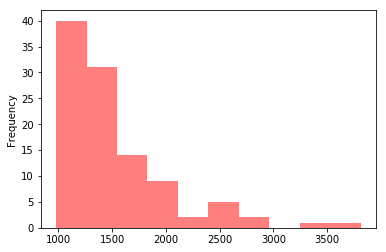

In [4]:
db['Average Monthly Wage'].plot.hist(alpha=0.5, color='red')

To note:

- Grammar is `.plot.hist`
- End line with `;` to avoid matplotlib print

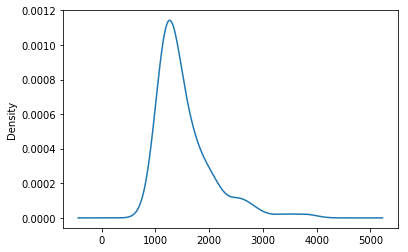

In [5]:
db['Average Monthly Wage'].plot.kde();

In [6]:
# Subset to municipalities (by jobs)
largest = db.set_index('NM_MUNICIP')\
            ['Total Jobs']\
            .sort_values()\
            .tail()
largest

NM_MUNICIP
NOVA LIMA           46369
SETE LAGOAS         56124
BETIM              121269
CONTAGEM           209001
BELO HORIZONTE    1354683
Name: Total Jobs, dtype: int64

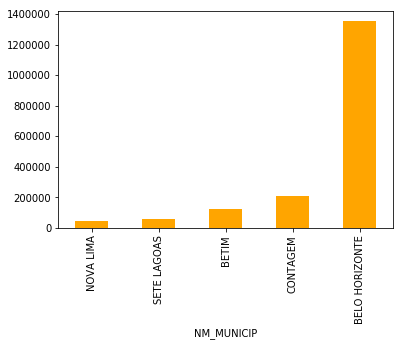

In [7]:
largest.plot.bar(color='orange');

To note:

* Pull out column and sort its values
* Pipe into bar chart

---
**CHALLENGE**

Create a bar plot for the five most productive municipalities (as expressed by average wage

---

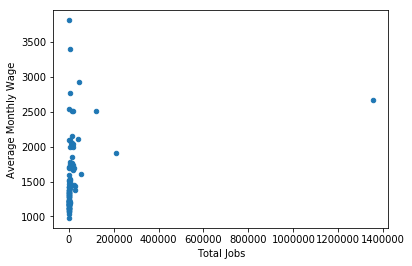

In [8]:
db.plot.scatter('Total Jobs', 'Average Monthly Wage')

To note:

* Peak into correlation
* Runs into problems if too many dots

---

**CHALLENGE**

* Explore the distribution of jobs and establishments
* Consider the relationship between industry diversity and average wages

---

### A bit more sophisticated 

`seaborn` to the rescue!

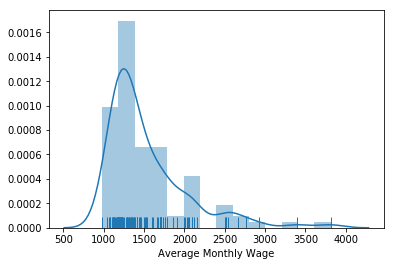

In [9]:
sns.distplot(db['Average Monthly Wage'], kde=True, rug=True);

To note:

* Histogram + KDE + rugs (each of them optional!)

Try and play around with different arguments! (Tip: check the [official documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)).

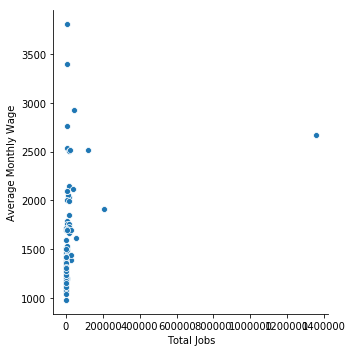

In [10]:
sns.relplot(x='Total Jobs', y='Average Monthly Wage', data=db);

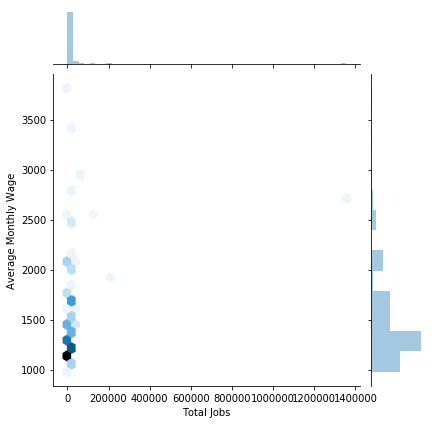

In [11]:
sns.jointplot(x='Total Jobs', y='Average Monthly Wage', 
              data=db, kind='hex');

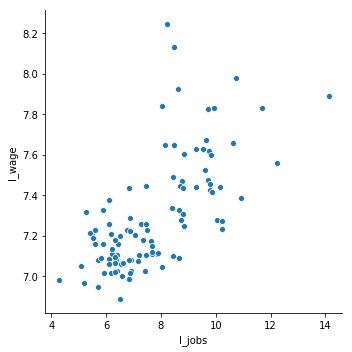

In [12]:
sns.relplot(x='l_jobs', y='l_wage', 
            data=db.assign(l_jobs=np.log(db['Total Jobs']))\
                   .assign(l_wage=np.log(db['Average Monthly Wage'])));

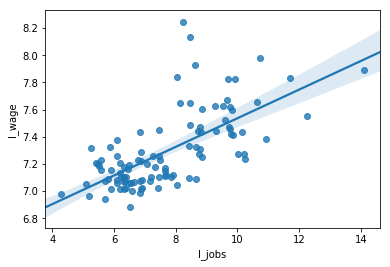

In [13]:
sns.regplot(x='l_jobs', y='l_wage', 
            data=db.assign(l_jobs=np.log(db['Total Jobs']))\
                   .assign(l_wage=np.log(db['Average Monthly Wage'])));

---

**CHALLENGE** 

Explore the other options of `jointplot` in the [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) and try to use the function to create KDE surface.

---

### Categorical visualizations


* Get quantiles of the size

In [14]:
qtl = pd.qcut(db['Total Jobs'], 5, 
              labels=['XS', 'S', 'M', 'L', 'XL'])
qtl.head()

0     M
1    XS
2     S
3     M
4     L
Name: Total Jobs, dtype: category
Categories (5, object): [XS < S < M < L < XL]

---

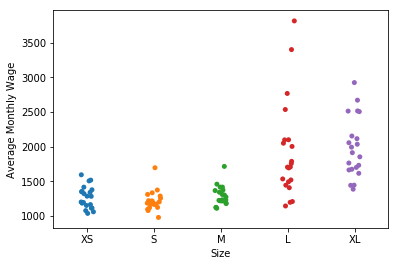

In [15]:
sns.stripplot(x='Size', y='Average Monthly Wage', 
              data=db.assign(Size=qtl));

**CHALLENGE** - Try to get a similar plot for industry diversity.

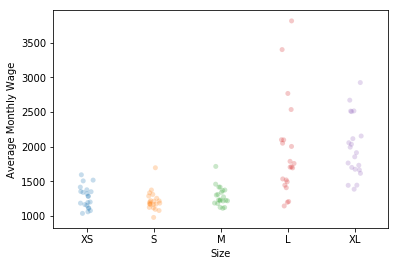

In [16]:
sns.stripplot(x='Size', y='Average Monthly Wage', 
              data=db.assign(Size=qtl),
              alpha=0.25);

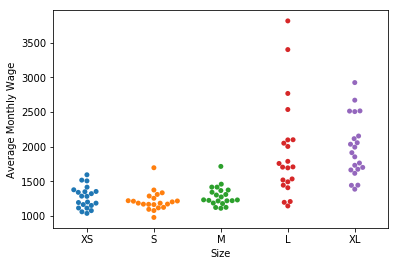

In [17]:
sns.swarmplot(x='Size', y='Average Monthly Wage', 
              data=db.assign(Size=qtl));

To note:

* With larger datasets, it's hard to see any pattern
* This is true even if you jitter the points around to avoid overlap and/or you play with transparency (`alpha`)
* Algorithms to separate out dots exist but they're computationally intensive and can only do so much

### Visualisation *"a-la carte"*

#### One

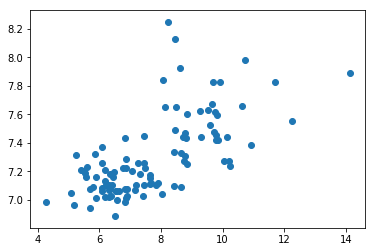

In [18]:
f, ax = plt.subplots(1)

ax.scatter(np.log(db['Total Jobs']), 
           np.log(db['Average Monthly Wage']))

plt.show()

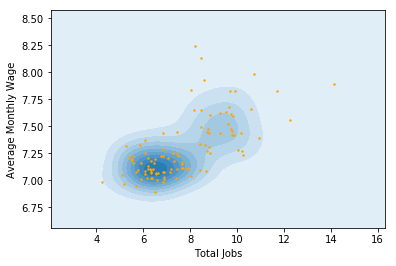

In [19]:
f, ax = plt.subplots(1)

sns.kdeplot(np.log(db['Total Jobs']), 
           np.log(db['Average Monthly Wage']), 
            shade=True, ax=ax)
ax.scatter(np.log(db['Total Jobs']), 
           np.log(db['Average Monthly Wage']),
           c='orange', s=2)

plt.show()

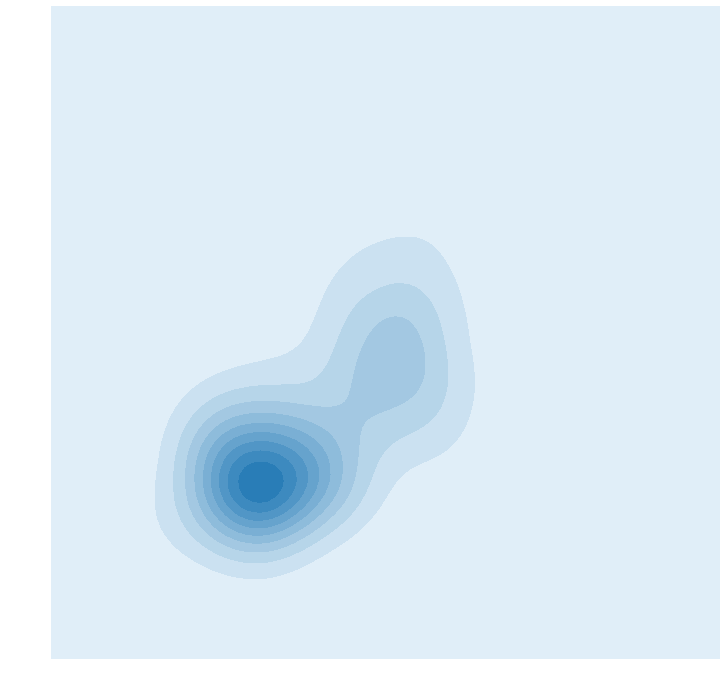

In [20]:
f, ax = plt.subplots(1, figsize=(12, 12))

sns.kdeplot(np.log(db['Total Jobs']), 
            np.log(db['Average Monthly Wage']), 
            shade=True, ax=ax)
ax.set_axis_off()

plt.show()

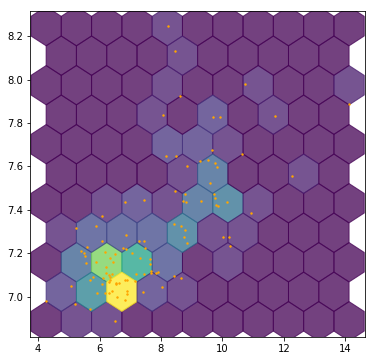

In [21]:
f, ax = plt.subplots(1, figsize=(6, 6))

ax.hexbin(np.log(db['Total Jobs']), 
          np.log(db['Average Monthly Wage']), 
          gridsize=10, alpha=0.75)
ax.scatter(np.log(db['Total Jobs']), 
           np.log(db['Average Monthly Wage']),
           c='orange', s=2)

#plt.savefig('myfig.jpg', dpi=900)
plt.show()

#### Two or more

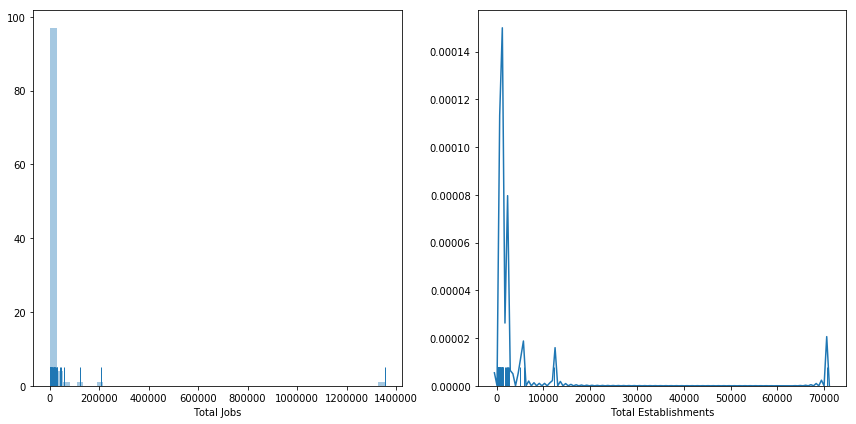

In [22]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(db['Total Jobs'], kde=False, rug=True, ax=axs[0])
sns.distplot(db['Total Establishments'], 
             hist=False, kde=True, rug=True, ax=axs[1])
plt.tight_layout()

plt.show()

**CHALLENGE** - Create a visualisation with three subplots:

1. Histogram of Total Jobs
1. Scatter plot of Total Jobs Vs Average Monthly Wage
1. Histogram of Average Monthly Wage

---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
